## Weather Analysis

### Importing Packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math as m
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

### Functions

In [3]:
def read_data(path):
    return pd.read_csv(path)

def separator(n=50):
    print("-"*n)
    
### Function to remove spaces
def remove(string):
    return string.replace(" ", "")

### function for printing number of unique elements and unique values in columns 
def unique_ele(data,col):
    for c in col:
        print("The number of unique elements in column",c,data[c].nunique())
        print("The unique values in column",c,data[c].unique())
        print("The values counts of columns",c)
        print(data[c].value_counts())
        separator(75)

###Function to treat outliers
def treat_outliers(data):
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3-q1
    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)
    for i in range(0,len(data)):
        if (data[i]>upper) or (data[i]<lower):
            if (data[i]>upper):
                data[i] = upper
            elif (data[i]<lower):
                data[i]=lower
    return data


### Data Analysis

In [4]:
### storing data from csv
weather_station_data = read_data('https://raw.githubusercontent.com/harankumar16/Weather-Analysis/main/Weather%20Station%20Locations.csv')
summary_weather_station_data = read_data('https://raw.githubusercontent.com/harankumar16/Weather-Analysis/main/Summary%20of%20Weather.csv')

### Printing data for analysing
print("Data in weather station data set...")
print(weather_station_data.head())
separator(100)

print("Data in Summary weather station data set...")
print(summary_weather_station_data.head())
separator(100)

### printing of data types
print("Data types of Weather station data set")
print(weather_station_data.dtypes)
separator()

print("Data types of Summary Weather station data set")
print(summary_weather_station_data.dtypes)
separator()

### Printing of info
print("Info of Weather station data set")
print(weather_station_data.info())
separator()

print("Info of Summary Weather station data set")
print(summary_weather_station_data.info())
separator()

## Priniting of shape
print("Shape of weather station data set")
print(weather_station_data.shape)
separator()

print("Shape of summary weather station")
print(summary_weather_station_data.shape)

### printing unique columns in data
print(unique_ele(weather_station_data,weather_station_data.columns))
print(unique_ele(summary_weather_station_data,summary_weather_station_data.columns))

C:\Users\HARANKUMAR\AppData\Local\Temp\ipykernel_10924\1514579593.py:2: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path)


Data in weather station data set...
    WBAN            NAME STATE/COUNTRY ID    LAT     LON  ELEV   Latitude  \
0  33013          AIN EL               AL  3623N  00637E   611  36.383333   
1  33031        LA SENIA               AL  3537N  00037E    88  35.616667   
2  33023  MAISON BLANCHE               AL  3643N  00314E    23  36.716667   
3  33044        TELERGMA               AL  3607N  00621E   754  36.116667   
4  12001         TINDOUF               AL  2741N  00809W   443  27.683333   

   Longitude  
0   6.650000  
1   0.583333  
2   3.216667  
3   6.416667  
4  -8.083333  
----------------------------------------------------------------------------------------------------
Data in Summary weather station data set...
     STA      Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0  10001  1942-7-1  1.016          NaN  25.555556  22.222222  23.888889   
1  10001  1942-7-2      0          NaN  28.888889  21.666667  25.555556   
2  10001  1942-7-3   2.54          NaN  2

### Data Pre Processing

In [5]:
### Changing the column name wban to sta for merging the data sets
weather_station_data.rename(columns={'WBAN':'STA'},inplace=True)

### Assigning the merged data to weather data
weather_data = pd.merge(summary_weather_station_data,weather_station_data, on=["STA"])

print("Data in weather data set...")
print(weather_data.head())
separator()
print("Data types of Weather data set")
print(weather_data.dtypes)
separator()
print("Info of Weather data set")
print(weather_data.info())
separator()

### Check duplicates
print("Number of duplicated values before removing duplicates are: ",weather_data.duplicated().sum())

### Removing the duplicated values
weather_data.drop_duplicates(inplace=True)

print("Number of duplicated values After removing duplicates are: ",weather_data.duplicated().sum())
separator()


Data in weather data set...
     STA      Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0  10001  1942-7-1  1.016          NaN  25.555556  22.222222  23.888889   
1  10001  1942-7-2      0          NaN  28.888889  21.666667  25.555556   
2  10001  1942-7-3   2.54          NaN  26.111111  22.222222  24.444444   
3  10001  1942-7-4   2.54          NaN  26.666667  22.222222  24.444444   
4  10001  1942-7-5      0          NaN  26.666667  21.666667  24.444444   

  Snowfall PoorWeather  YR  ...  RHN  RVG WTE   NAME  STATE/COUNTRY ID    LAT  \
0      0.0         NaN  42  ...  NaN  NaN NaN  ACCRA                GH  0536N   
1      0.0         NaN  42  ...  NaN  NaN NaN  ACCRA                GH  0536N   
2      0.0         NaN  42  ...  NaN  NaN NaN  ACCRA                GH  0536N   
3      0.0         NaN  42  ...  NaN  NaN NaN  ACCRA                GH  0536N   
4      0.0         NaN  42  ...  NaN  NaN NaN  ACCRA                GH  0536N   

      LON  ELEV Latitude  Longitud

In [6]:
### null checking
weather_null_count = weather_data.isnull().sum()
print(weather_null_count)
separator()
print(len(weather_null_count))
print(len(weather_data.columns))
separator()
print(len(weather_data))

weather_data.drop(columns= weather_data.columns[weather_null_count == len(weather_data)].tolist(),axis=1,inplace=True)

print(weather_data)



STA                      0
Date                     0
Precip                   0
WindGustSpd         118498
MaxTemp                  0
MinTemp                  0
MeanTemp                 0
Snowfall              1163
PoorWeather          84797
YR                       0
MO                       0
DA                       0
PRCP                  1932
DR                  118497
SPD                 118498
MAX                    474
MIN                    468
MEA                    498
SNF                   1163
SND                 113467
FT                  119030
FB                  119030
FTI                 119030
ITH                 119030
PGT                 118505
TSHDSBRSGF           84797
SD3                 119030
RHX                 119030
RHN                 119030
RVG                 119030
WTE                 119030
NAME                     0
STATE/COUNTRY ID         0
LAT                      0
LON                      0
ELEV                     0
Latitude                 0
L

In [9]:
### check for unique values and their counts
unique_ele(weather_data,weather_data.columns)

### drop the columns which are having only 1 values 
weather_data.drop(columns=['WindGustSpd','Snowfall','DR','SPD','SND','PGT','TSHDSBRSGF'],axis=1,inplace=True)

print("Null values after dropping the null columns")
print(weather_data.isnull().sum())
separator()
### filling the null values with 0
weather_data.fillna(0,inplace=True)

### Converting the data types for object to float
###Precip,Snowfall,PoorWeather,PRCP column contains t value we can change to 0
#weather_data[weather_data['PRCP']=='T']
weather_data.replace('T',0,inplace=True)

### Poor weather contains str values with unwanted spaces so removing those
poor_weather_unique_values = weather_data['PoorWeather'].unique()
for i in range (0,len(poor_weather_unique_values)):
    weather_data['PoorWeather'].replace(poor_weather_unique_values[i],remove(str(poor_weather_unique_values[i])),inplace=True)

### snowfall has a invalid value ##Value
weather_data['Snowfall'].unique()
weather_data.replace('#VALUE!',0,inplace=True)

### Modifying object data types to float wherever needed
weather_data[['Precip','Snowfall','PoorWeather','PRCP']] = weather_data[['Precip','Snowfall','PoorWeather','PRCP']].astype('float')

### printing the data types
print(weather_data.dtypes)
separator()

The number of unique elements in column STA 159
The unique values in column STA [10001 10002 10101 10102 10502 10505 10701 10703 10704 10705 10718 10802
 10803 10804 10806 10807 11101 11103 11501 11601 11604 11606 11610 11615
 11701 11704 11801 11901 11902 12001 12101 12701 12702 12706 12801 13002
 13005 13007 13013 13201 13601 15027 16101 16201 16202 16405 16407 16504
 20501 20602 21501 22502 22504 22507 22508 22509 30001 31001 31101 31302
 31401 31501 31701 32301 32501 32503 32504 32601 32602 32603 32701 32702
 32801 32803 32805 32812 32815 32904 32906 32907 33003 33013 33014 33019
 33023 33031 33044 33109 33111 33117 33121 33123 33205 33206 33303 33305
 33307 33401 33405 33406 33501 34002 34003 34005 34012 34013 34017 34018
 34022 34101 34104 34105 34109 34111 34113 34123 34139 34147 34150 40601
 41204 41207 42204 42206 42401 43201 43302 43305 43307 44401 50301 50302
 50303 50304 50401 50403 50801 50802 60701 61501 61502 62701 80411 80412
 80425 80504 80509 80510 81404 81601 81702 8

KeyError: "['WindGustSpd', 'Snowfall', 'DR', 'SPD', 'SND', 'PGT', 'TSHDSBRSGF'] not found in axis"

### Exploratory Data Analysis

The columns for box plot are...
 ['STA', 'MaxTemp', 'MinTemp', 'MeanTemp', 'YR', 'MO', 'DA', 'MAX', 'MIN', 'MEA', 'ELEV', 'Latitude', 'Longitude']
Box plot for the column - STA


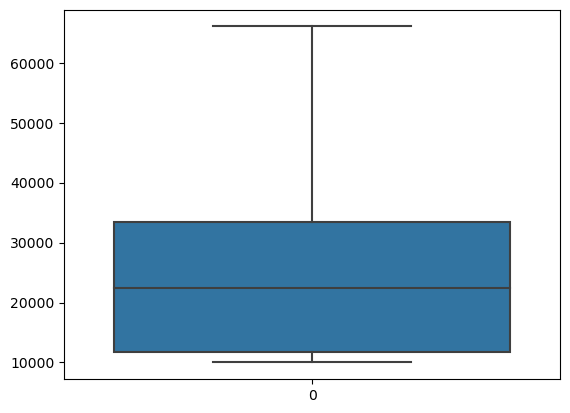

Box plot for the column - MaxTemp


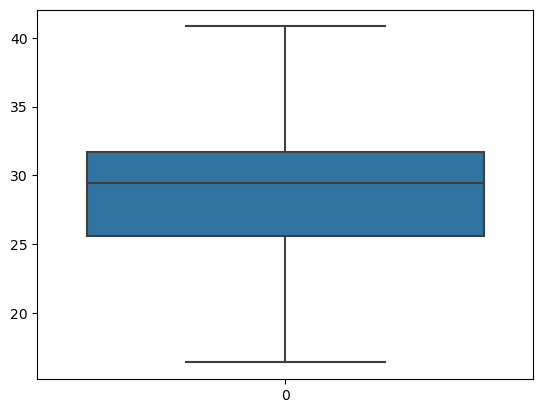

Box plot for the column - MinTemp


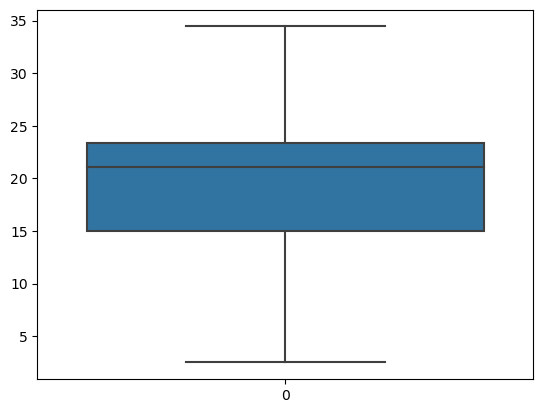

Box plot for the column - MeanTemp


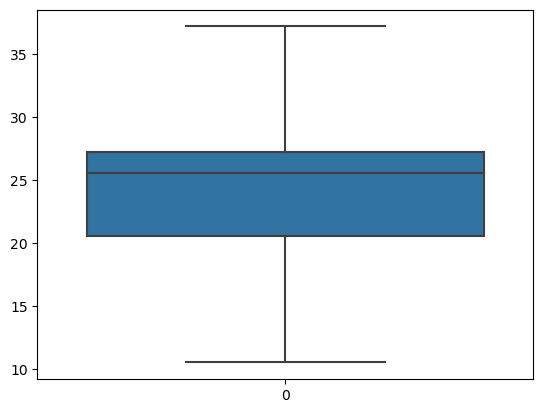

Box plot for the column - YR


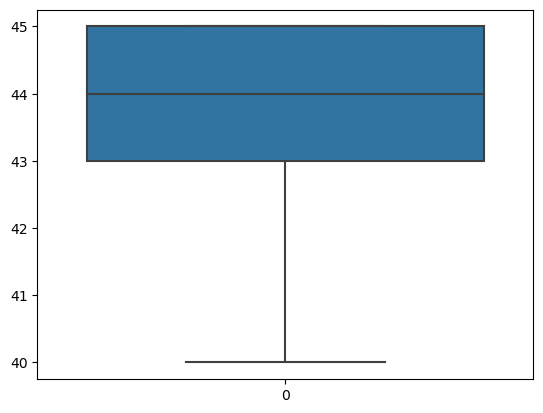

Box plot for the column - MO


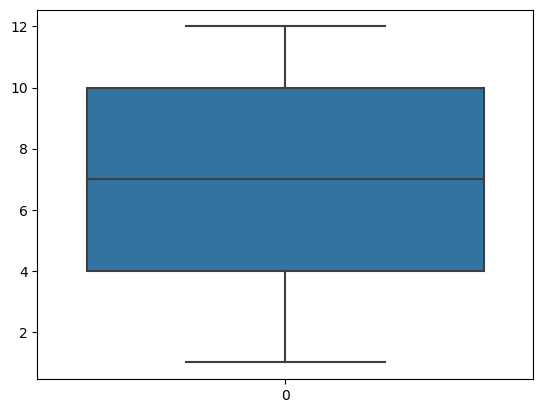

Box plot for the column - DA


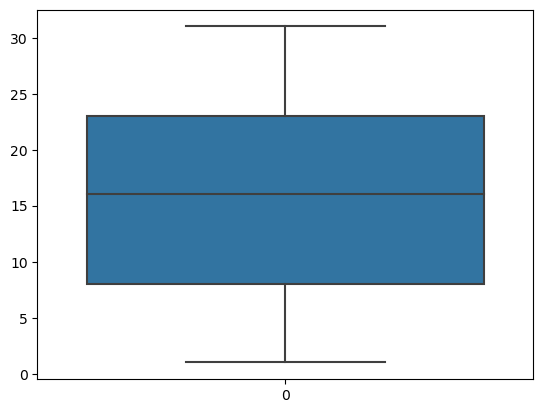

Box plot for the column - MAX


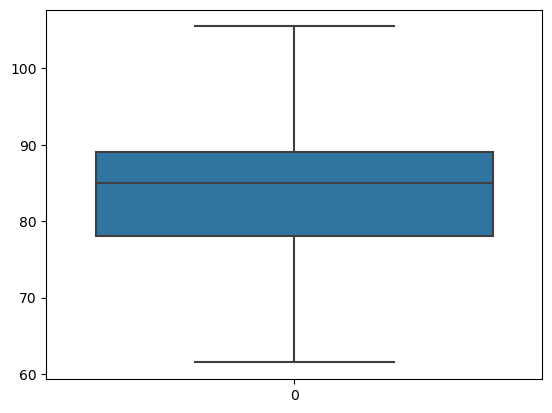

Box plot for the column - MIN


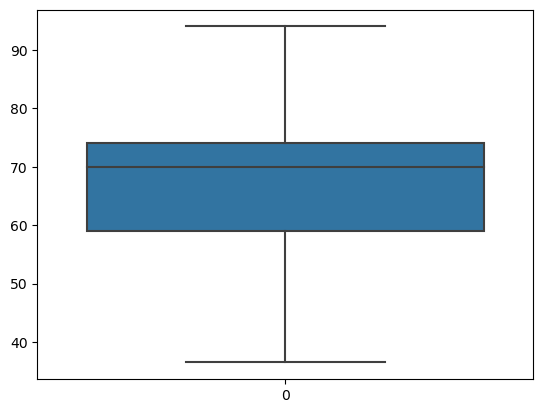

Box plot for the column - MEA


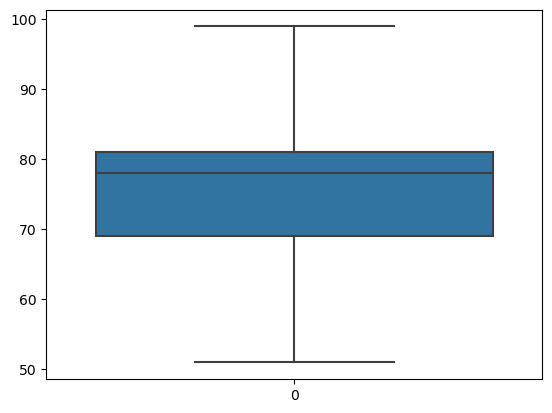

Box plot for the column - ELEV


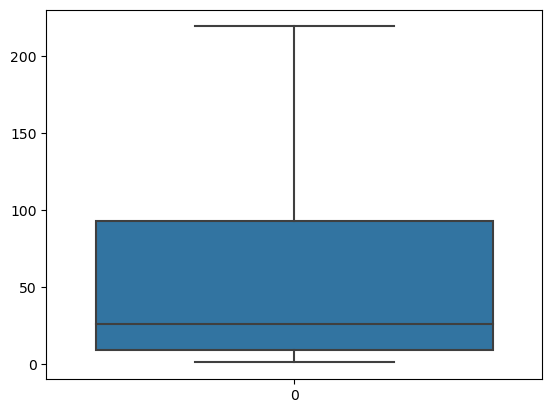

Box plot for the column - Latitude


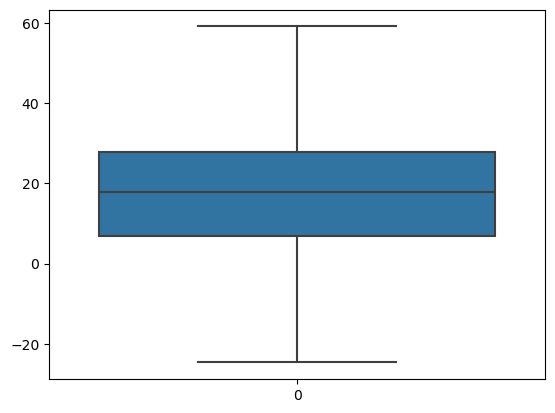

Box plot for the column - Longitude


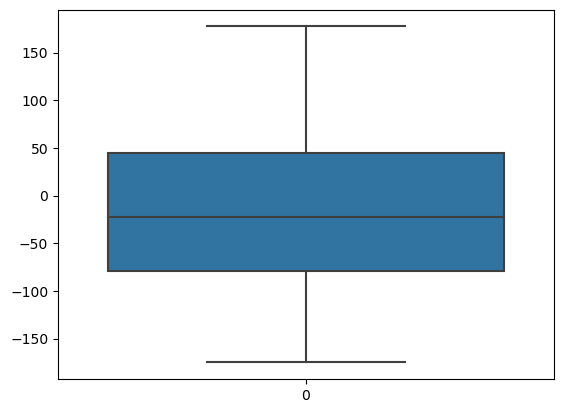

In [11]:
### Store the int and float columns in a variable
boxplt_columns = weather_data.columns[weather_data.dtypes != 'object'].tolist()
print("The columns for box plot are...\n",boxplt_columns)

### Check for outliers and treat them 
for i in boxplt_columns:
    print("Box plot for the column -",i)
    weather_data[i]=treat_outliers(weather_data[i].values)
    sns.boxplot(weather_data[i].values)
    plt.show()

In [12]:
weather_data

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,PoorWeather,YR,MO,DA,...,MIN,MEA,SNF,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0,42,7,1,...,72.0,75.0,0.0,ACCRA,GH,0536N,00010W,62,5.60,-0.300000
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0,42,7,2,...,71.0,78.0,0.0,ACCRA,GH,0536N,00010W,62,5.60,-0.300000
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0,42,7,3,...,72.0,76.0,0.0,ACCRA,GH,0536N,00010W,62,5.60,-0.300000
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0,42,7,4,...,72.0,76.0,0.0,ACCRA,GH,0536N,00010W,62,5.60,-0.300000
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0,42,7,5,...,71.0,76.0,0.0,ACCRA,GH,0536N,00010W,62,5.60,-0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,66051,1945-12-27,0,28.333333,18.333333,23.333333,0,45,12,27,...,65.0,74.0,0.0,BRISBANE,AU,2726S,15305E,2,-24.65,153.133333
119036,66051,1945-12-28,9.906,29.444444,18.333333,23.888889,1.0,45,12,28,...,65.0,75.0,0.0,BRISBANE,AU,2726S,15305E,2,-24.65,153.133333
119037,66051,1945-12-29,0,28.333333,18.333333,23.333333,1.0,45,12,29,...,65.0,74.0,0.0,BRISBANE,AU,2726S,15305E,2,-24.65,153.133333
119038,66051,1945-12-30,0,28.333333,18.333333,23.333333,0,45,12,30,...,65.0,74.0,0.0,BRISBANE,AU,2726S,15305E,2,-24.65,153.133333


C:\Users\HARANKUMAR\AppData\Local\Temp\ipykernel_10924\1480649103.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather_data.corr(),annot=True)


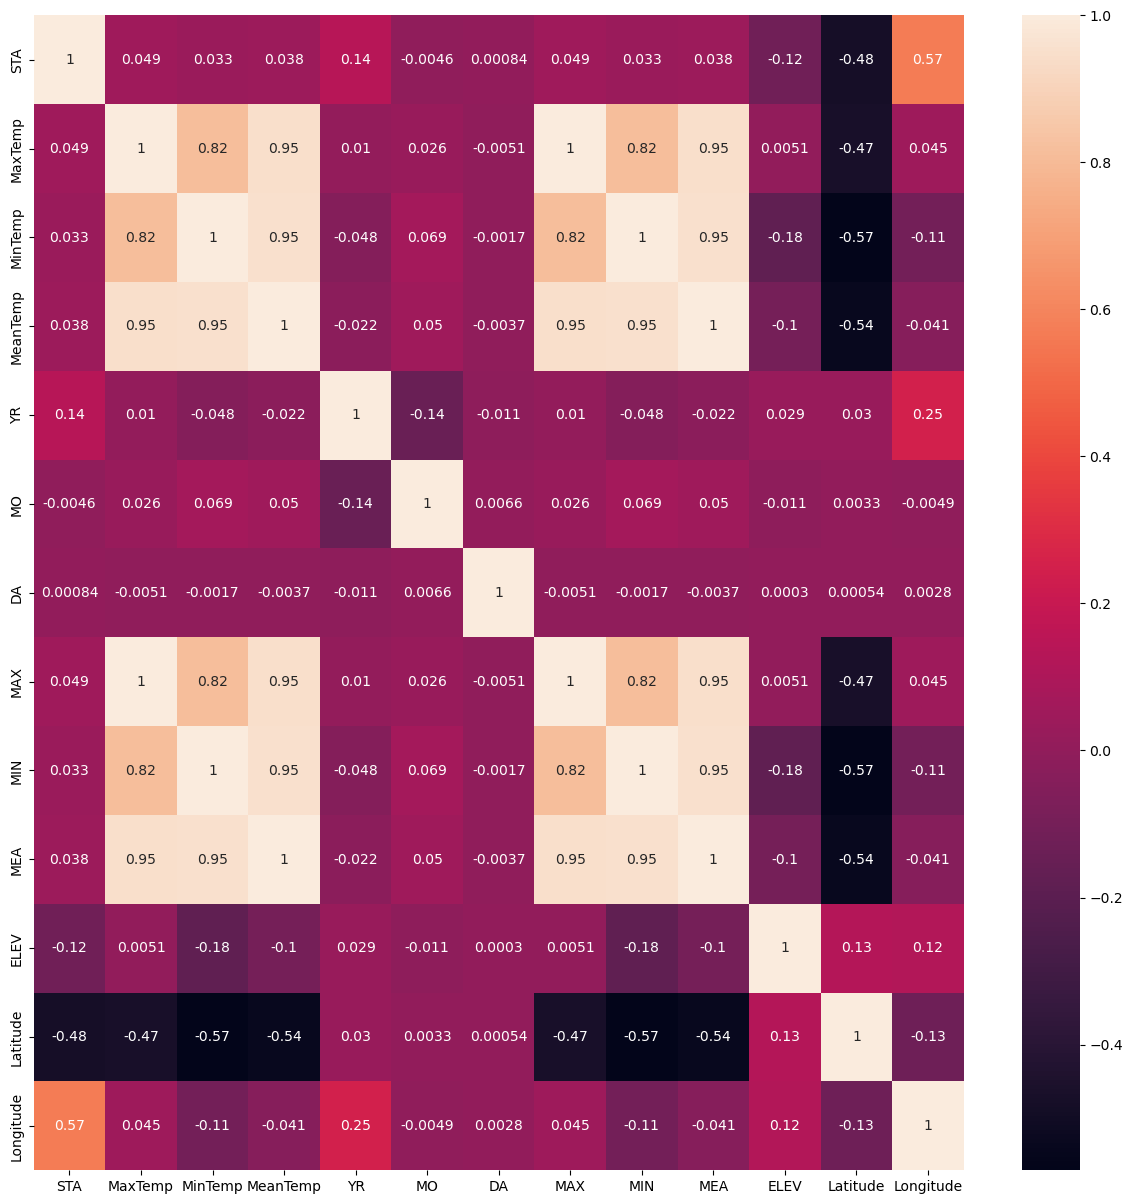

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(weather_data.corr(),annot=True)
plt.show()

In [23]:
y = weather_data[['MaxTemp','MinTemp']]
x = weather_data[['MeanTemp','MAX','MIN','MEA','Latitude']]

print("Independent Datasets - X")
print(x)
separator()

print("Dependent Datasets - Y")
print(y)

Independent Datasets - X
         MeanTemp   MAX   MIN   MEA  Latitude
0       23.888889  78.0  72.0  75.0      5.60
1       25.555556  84.0  71.0  78.0      5.60
2       24.444444  79.0  72.0  76.0      5.60
3       24.444444  80.0  72.0  76.0      5.60
4       24.444444  80.0  71.0  76.0      5.60
...           ...   ...   ...   ...       ...
119035  23.333333  83.0  65.0  74.0    -24.65
119036  23.888889  85.0  65.0  75.0    -24.65
119037  23.333333  83.0  65.0  74.0    -24.65
119038  23.333333  83.0  65.0  74.0    -24.65
119039  23.333333  85.0  63.0  74.0    -24.65

[119030 rows x 5 columns]
--------------------------------------------------
Dependent Datasets - Y
          MaxTemp    MinTemp
0       25.555556  22.222222
1       28.888889  21.666667
2       26.111111  22.222222
3       26.666667  22.222222
4       26.666667  21.666667
...           ...        ...
119035  28.333333  18.333333
119036  29.444444  18.333333
119037  28.333333  18.333333
119038  28.333333  18.333333
119

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

Accuracy of Linear Regression Model is 100.0


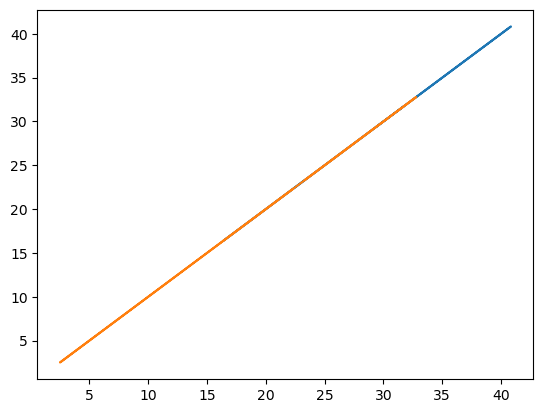

In [48]:
### Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
linear_pred = linear_model.predict(x_test)
#linear_pred
print("Accuracy of Linear Regression Model is", r2_score(y_test,linear_pred)*100)
plt.plot(y_test,linear_pred)
plt.show()

Accuracy of Lasso Regression Model is 99.99978226950448


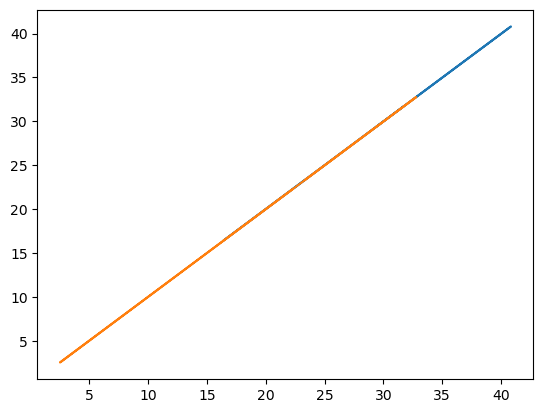

In [47]:
### Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)
lasso_pred = lasso_model.predict(x_test)
#lasso_pred
print("Accuracy of Lasso Regression Model is", r2_score(y_test,lasso_pred)*100)
plt.plot(y_test,lasso_pred)
plt.show()

Accuracy of Ridge Regression Model is 99.99999999995916


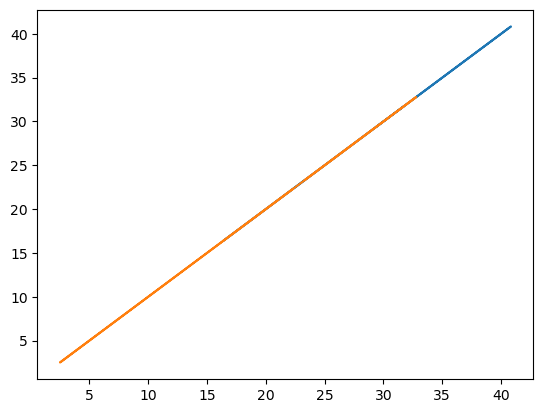

In [46]:
### Ridge Regression
ridge_model = Ridge()
ridge_model.fit(x_train,y_train)
ridge_pred = ridge_model.predict(x_test)
ridge_pred
print("Accuracy of Ridge Regression Model is", r2_score(y_test,ridge_pred)*100)
plt.plot(y_test,ridge_pred)
plt.show()

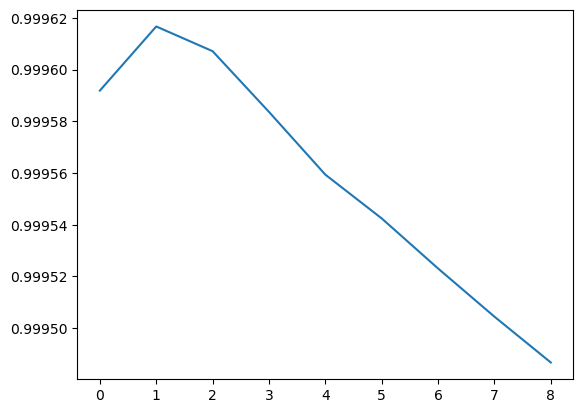

Accuracy of KNN Regression Model is 99.96166663840823


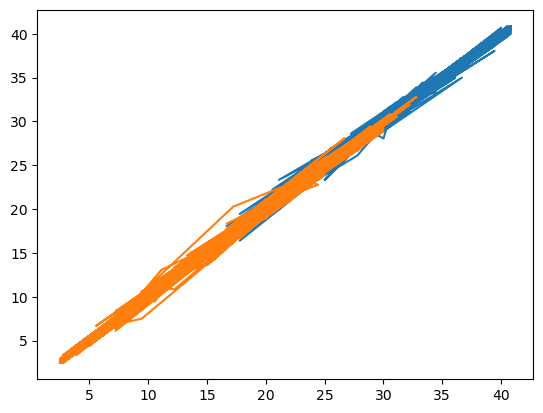

In [63]:
### Knn Regression
error = []
for i in range(1,10):
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(x_train,y_train)
    knn_pred = knn_model.predict(x_test)
    error.append(r2_score(y_test,knn_pred))
plt.plot(error)
plt.show()
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(x_train,y_train)
knn_pred = knn_model.predict(x_test)
print("Accuracy of KNN Regression Model is", r2_score(y_test,knn_pred)*100)
plt.plot(y_test,knn_pred)
plt.show()